# Introduction

The primary component of a neural network is the "perceptron", which in essence is the following function:

$ f(x) = \left\{ \begin{array}{cl} 1 & if \ \ \ w·x + b > 0 \\ 0 & otherwise \end{array} \right. $

where `w` is the coefficient, commonly called the 'weight' in neural networks

and `w·x` is the dot product of many inputs with the weight

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np

In [561]:
# let us define a perceptron with a weight and bias
# a prediction formula as per above
# and a step function which adjusts weight and bias depending on prediction

class Perceptron:
    def __init__(self):
        self.w = 1.0
        self.b = 0.0
        
    def predict(self, x):
        ŷ = sum(x * self.w) + self.b
        if ŷ > 0:
            return 1
        return 0
    
    def step(self, vx, vy, lr=0.01):
        for x, y in zip(vx, vy):
            ŷ = self.predict(x)
            if ŷ - y == 1:
                self.w -= sum(x) * lr
                self.b -= lr
            elif ŷ - y == -1:
                self.w += sum(x) * lr
                self.b += lr

In [562]:
# we generate a perceptron with two inputs



1.0

# Generate Model & Data

In [602]:
m = Perceptron()

samples = 50
x = np.concatenate((np.random.rand(samples, 2) + 1, np.random.rand(samples, 2)), axis=0)
y = np.concatenate((np.zeros(samples), np.ones(samples)), axis=0)

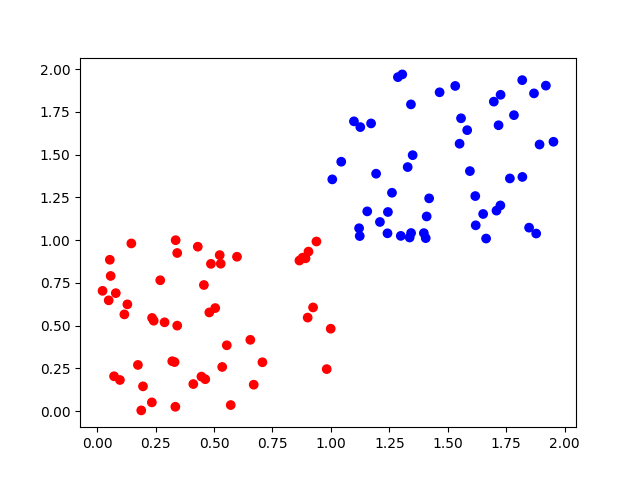

In [603]:
# step the model forward a couple of times and adjust its weight and bias
# until it is able to separate the groups of points
for i in range(30):
    m.step(x, y)


plt.close('all')
fig, ax = plt.subplots()

plt.scatter(x[:,0], x[:,1], c=list(map(m.predict, x)), cmap='bwr')

# Neural Network

The simplest form of neural network is called an MLP (multilayer perceptron). 

We say it is fully connected, feed forward, and can use one of many activation functions. Let us build one and test its capabilities.

In [606]:
class MLP:
    def __init__(self):
        self.w = 1.0
        self.b = 0.0
        self.act = np.tanh
        
    def predict(self, x):
        ŷ = sum(x * self.w) + self.b
        if ŷ > 0:
            return 1
        return 0
    
    def step(self, vx, vy, lr=0.01):
        for x, y in zip(vx, vy):
            ŷ = self.predict(x)
            if ŷ - y == 1:
                self.w -= sum(x) * lr
                self.b -= lr
            elif ŷ - y == -1:
                self.w += sum(x) * lr
                self.b += lr